# Quantum Tomography analysis

This is the analysis code to measure the polarisation of a vector meson using Quantum Tomography.

In [1]:
import os
import sys
import warnings
import matplotlib.pyplot as plt
import pickle
import uproot
import numpy as np
import pandas as pd
# import xgboost as xgb
import sklearn

sys.path.insert(0, '../')
# import analysis_utils as au

# avoid pandas warning
warnings.simplefilter(action='ignore', category=FutureWarning)

## A few infos on the libraries

### uproot

uproot is a Python package that provides tools for reading/writing ROOT files using Python and Numpy (does not depend on ROOT) and is primarly intended to stream data into machine learning libraries in Python.

We use uproot for reading and converting ROOT Trees into ***pandas*** **DataFrame**.
For more details: https://github.com/scikit-hep/uproot.

Now we load our data using uproot: signal and background for the training of the models and the unknown data on which we would like to have the model predictions

In [2]:
# datatree = uproot.open('AnalysisResults.root')['Data']
# datatree = uproot.open('MC/AnalysisResultsCohJpsi_GridTest.root')['MyTask/fOutputTreeMC']
# datatree = uproot.open('MC/AnalysisResultsCohJpsiLocal.root')['MyTask/fOutputTreeMC']
# datatree = uproot.open('MC/AnalysisResultsCohJpsiLocal.root')['MyTask/fOutputTree']
# datatree = uproot.open('MC/AnalysisResultsCohJpsiLPLocal.root')['MyTask/fOutputTree']
# datatree = uproot.open('MC/AnalysisResultsGammaGammaMediumLocal.root')['MyTask/fOutputTree']
# datatree = uproot.open('MC/AnalysisResultsLHC18q_QT.root')['Data']
# datatree = uproot.open('MC/AnalysisResultsLHC18r_QT.root')['Data']
datatree = uproot.open('MC/AnalysisResultsLHC15o_QT.root')['Data']

In [3]:
datatree.keys()
# IncohMC_std_gener.keys()
# background_treeMine.keys()
# data_treeMine.keys()

[b'fInvariantMassDimuon',
 b'fRapidityDimuon',
 b'fPtDimuon',
 b'fRapiditySingleMuon_0',
 b'fPtSingleMuon_0',
 b'fPhiSingleMuon_0',
 b'fRapiditySingleMuon_1',
 b'fPtSingleMuon_1',
 b'fPhiSingleMuon_1',
 b'fPxSingleMuon_0',
 b'fPySingleMuon_0',
 b'fPzSingleMuon_0',
 b'fEnergySingleMuon_0',
 b'fPxSingleMuon_1',
 b'fPySingleMuon_1',
 b'fPzSingleMuon_1',
 b'fEnergySingleMuon_1']

In [4]:
data_df = datatree.pandas.df()

In [5]:
len(data_df.index)

21341

In [6]:
generatedevents = len(data_df.index)
generatedevents

21341

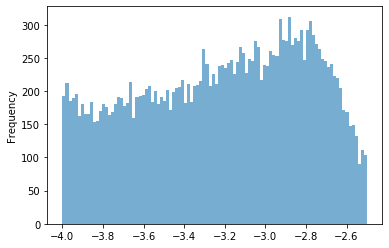

In [11]:
data_df['fRapiditySingleMuon_0'].plot.hist(bins=100, alpha=0.6)


In [17]:
data_df['RapDimuon'] = data_df.apply(lambda x: RapidityDimuon(x['fPxSingleMuon_0'], x['fPySingleMuon_0'], x['fPzSingleMuon_0'], x['fEnergySingleMuon_0'], x['fPxSingleMuon_1'], x['fPySingleMuon_1'], x['fPzSingleMuon_1'],  x['fEnergySingleMuon_1']   ), axis=1)
data_df

,fInvariantMassDimuon,fRapidityDimuon,fPtDimuon,fRapiditySingleMuon_0,fPtSingleMuon_0,fPhiSingleMuon_0,fRapiditySingleMuon_1,fPtSingleMuon_1,fPhiSingleMuon_1,fPxSingleMuon_0,fPySingleMuon_0,fPzSingleMuon_0,fEnergySingleMuon_0,fPxSingleMuon_1,fPySingleMuon_1,fPzSingleMuon_1,fEnergySingleMuon_1,RapDimuon
entry,,,,,,,,,,,,,,,,,,
0,3.123686,-3.230601,0.113070,-3.202027,1.603052,1.301547,-3.265556,1.513957,4.398447,0.426425,1.545296,-19.670760,19.736254,-0.467526,-1.439960,-19.799905,19.857982,-3.230601
1,3.098192,-3.654333,0.109067,-3.335872,1.425750,2.862891,-3.958225,1.522518,6.038635,-1.370736,0.392234,-20.008471,20.059483,1.477218,-0.368632,-39.848262,39.877477,-3.654333
2,4.522394,-3.283714,0.579136,-3.361368,2.551885,3.387287,-3.186520,1.985236,0.298845,-2.475248,-0.620695,-36.739361,36.828032,1.897245,0.584487,-23.984375,24.066627,-3.283714
3,2.054497,-3.907499,0.024180,-3.858667,1.029313,4.428421,-3.967939,1.011362,1.302707,-0.288379,-0.988090,-24.384959,24.406902,0.267899,0.975235,-26.728523,26.747859,-3.907499
4,3.037787,-2.658734,0.066820,-2.508330,1.466076,0.481293,-2.807619,1.531267,3.632671,1.299525,0.678684,-8.945254,9.065214,-1.350309,-0.722111,-12.640668,12.733516,-2.658734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,2.272984,-2.952893,0.072006,-3.123786,1.083577,2.250013,-2.800486,1.151303,5.369712,-0.680685,0.843093,-12.292251,12.340371,0.703446,-0.911406,-9.435995,9.506559,-2.952893
21337,2.817354,-2.626659,0.120189,-2.759661,1.336734,2.906441,-2.509668,1.453413,6.068719,-1.299945,0.311447,-10.514200,10.599359,1.420116,-0.309324,-8.880024,8.998800,-2.626659
21338,2.577551,-3.507101,0.152681,-3.877741,1.264963,3.347634,-3.101208,1.124800,0.155279,-1.238207,-0.258795,-30.545229,30.571593,1.111267,0.173957,-12.473904,12.524960,-3.507101


In [22]:
data_df['ThetaSingleMuon_0'] = data_df.apply(lambda x: RapToTheta(x['fRapiditySingleMuon_0']), axis=1)
data_df

,fInvariantMassDimuon,fRapidityDimuon,fPtDimuon,fRapiditySingleMuon_0,fPtSingleMuon_0,fPhiSingleMuon_0,fRapiditySingleMuon_1,fPtSingleMuon_1,fPhiSingleMuon_1,fPxSingleMuon_0,fPySingleMuon_0,fPzSingleMuon_0,fEnergySingleMuon_0,fPxSingleMuon_1,fPySingleMuon_1,fPzSingleMuon_1,fEnergySingleMuon_1,RapDimuon,ThetaSingleMuon_0
entry,,,,,,,,,,,,,,,,,,,
0,3.123686,-3.230601,0.113070,-3.202027,1.603052,1.301547,-3.265556,1.513957,4.398447,0.426425,1.545296,-19.670760,19.736254,-0.467526,-1.439960,-19.799905,19.857982,-3.230601,3.060278
1,3.098192,-3.654333,0.109067,-3.335872,1.425750,2.862891,-3.958225,1.522518,6.038635,-1.370736,0.392234,-20.008471,20.059483,1.477218,-0.368632,-39.848262,39.877477,-3.654333,3.070456
2,4.522394,-3.283714,0.579136,-3.361368,2.551885,3.387287,-3.186520,1.985236,0.298845,-2.475248,-0.620695,-36.739361,36.828032,1.897245,0.584487,-23.984375,24.066627,-3.283714,3.072245
3,2.054497,-3.907499,0.024180,-3.858667,1.029313,4.428421,-3.967939,1.011362,1.302707,-0.288379,-0.988090,-24.384959,24.406902,0.267899,0.975235,-26.728523,26.747859,-3.907499,3.099407
4,3.037787,-2.658734,0.066820,-2.508330,1.466076,0.481293,-2.807619,1.531267,3.632671,1.299525,0.678684,-8.945254,9.065214,-1.350309,-0.722111,-12.640668,12.733516,-2.658734,2.979143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,2.272984,-2.952893,0.072006,-3.123786,1.083577,2.250013,-2.800486,1.151303,5.369712,-0.680685,0.843093,-12.292251,12.340371,0.703446,-0.911406,-9.435995,9.506559,-2.952893,3.053669
21337,2.817354,-2.626659,0.120189,-2.759661,1.336734,2.906441,-2.509668,1.453413,6.068719,-1.299945,0.311447,-10.514200,10.599359,1.420116,-0.309324,-8.880024,8.998800,-2.626659,3.015135
21338,2.577551,-3.507101,0.152681,-3.877741,1.264963,3.347634,-3.101208,1.124800,0.155279,-1.238207,-0.258795,-30.545229,30.571593,1.111267,0.173957,-12.473904,12.524960,-3.507101,3.100204


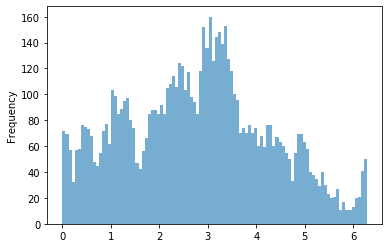

In [20]:
df_applycuts = data_df.query('fInvariantMassDimuon < 3.3 & fInvariantMassDimuon > 2.9 & RapDimuon < -2.5 & RapDimuon > -4.0 & fPtDimuon < 0.2 ')

df_applycuts['fPhiSingleMuon_0'].plot.hist(bins=100, alpha=0.6)


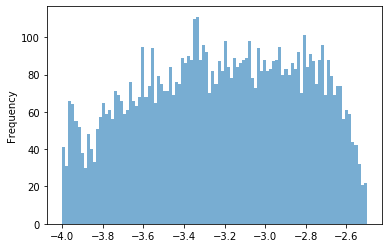

In [24]:
df_applycuts['fRapiditySingleMuon_1'].plot.hist(bins=100, alpha=0.6)


In [25]:
with open("Rapidity15o.txt", 'a') as f:
    f.write(
        df_applycuts['fRapiditySingleMuon_0'].to_string(header = False, index = False)
        df_applycuts['fRapiditySingleMuon_1'].to_string(header = False, index = False)
    )

    
with open("PhiSingle15o.txt", 'a') as f:
    f.write(
        df_applycuts['fPhiSingleMuon_0'].to_string(header = False, index = False)
        df_applycuts['fPhiSingleMuon_1'].to_string(header = False, index = False)
    )
    

SyntaxError: invalid syntax (<ipython-input-25-676f432dcb02>, line 4)

## Four-momentum logic

In [7]:
import skhep
from skhep import math


# Levi-Civita symbol
import sympy
from sympy import LeviCivita

In [12]:
help(math.LorentzVector)

Help on class LorentzVector in module skhep.math.vectors:

class LorentzVector(builtins.object)
 |  LorentzVector(x=0.0, y=0.0, z=0.0, t=0.0)
 |  
 |  Class representing a Lorentz vector,
 |  either a 4-dimensional Minkowski space-time vector or a 4-momentum vector.
 |  The 4-vector components can be seen as (x,y,z,t) or (px,py,pz,E).
 |  
 |  Constructors:
 |      __init__(x=0., y=0., z=0., t=0.)
 |      from4vector(avector)
 |      from3vector(vector3d, t)
 |  
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |      Addition with another LorentzVector, i.e. self+other.
 |  
 |  __div__ = __truediv__(self, number)
 |  
 |  __eq__(self, other)
 |      Equality to another LorentzVector, or, equality to zero.
 |      
 |      Example
 |      -------
 |      >>> v1 = ...
 |      >>> v2 = ...
 |      >>> print v1 == v2
 |      >>> print v1 == 0
 |  
 |  __getitem__(self, i)
 |      Get the ith vector component (commencing at 0, of course).
 |  
 |  __iadd__(self, other)
 |      (se

Quantum tomography works by defining three coordinate axes in a Lorentz-invariant approach.

Using \\( k_+^\mu \\), \\(k_-^\mu \\) for the positive and the negative muon, respectively, we construct the vector meson 4-vector \\( Q^\mu \\) as:

\\[ Q^\mu = k_+^\mu + k_-^\mu \\]

If \\( p_A^\mu, p_B^\mu \\) are the two beams, the three axes \\( X^\mu, Y^\mu, Z^\mu \\) are defined as:

\\[ Z^\mu = p_A^\mu  Q{\cdot}p_B - p_B^\mu Q{\cdot}p_A \\]

\\[ Y^\mu = \epsilon^{\mu\nu\alpha\beta}p_{A \nu}p_{B \alpha}Q_\beta \\]

\\[ X^\mu = Q^\mu - p_A^\mu \frac{Q^2}{2Q{\cdot}p_A} - p_B^\mu \frac{Q^2}{2Q{\cdot}p_B} \\]





In [ ]:
# def InvariantMass( px1, py1, pz1, E1, px2, py2, pz2, E2 ):
    
#     positiveMuon  = math.LorentzVector(px1, py1, pz1, E1)
#     negativeMuon  = math.LorentzVector(px2, py2, pz2, E2)
#     Q             = positiveMuon + negativeMuon
    
#     return math.sqrt(-Q.dot(Q))


In [ ]:
# data_df['InvMass'] = data_df.apply(lambda x: CosThetaTrueCollinsSoper(x['fTrkPx1'], x['fTrkPy1'], x['fTrkPz1'], x['fTrkE1'], x['fTrkPx2'], x['fTrkPy2'], x['fTrkPz2'],  x['fTrkE2']   ), axis=1)


In [21]:
def RapToTheta( rapidity ):
    
    expNegativeRap = np.exp(-rapidity)
    
    return 2*np.arctan(expNegativeRap)




In [16]:
def RapidityDimuon( px1, py1, pz1, E1, px2, py2, pz2, E2 ):
    
    positiveMuon  = math.LorentzVector(px1, py1, pz1, E1)
    negativeMuon  = math.LorentzVector(px2, py2, pz2, E2)
    Q             = positiveMuon + negativeMuon
    
    return Q.rapidity


In [ ]:
def CosThetaTrueCollinsSoper( px1, py1, pz1, E1, px2, py2, pz2, E2 ):
    
    positiveMuon  = math.LorentzVector(px1, py1, pz1, E1)
    negativeMuon  = math.LorentzVector(px2, py2, pz2, E2)
    Q             = positiveMuon + negativeMuon
    
    
    # Beam coordinates     

    HalfSqrtSnn   = 2510.
    MassOfLead208 = 193.6823
    MomentumBeam  = math.sqrt( HalfSqrtSnn*HalfSqrtSnn*208*208 - MassOfLead208*MassOfLead208 )
    
    pA            = math.LorentzVector( 0, 0,-1, 1 )
    pB            = math.LorentzVector( 0, 0, 1, 1 )
#     pA            = math.LorentzVector( 0, 0,-MomentumBeam, HalfSqrtSnn*208 )
#     pB            = math.LorentzVector( 0, 0, MomentumBeam, HalfSqrtSnn*208 )

    
    # Z axis
    
    z       = pA * (Q.dot(pB)) - pB * (Q.dot(pA))
#     NormOfz = z.mag
    NormOfz = math.sqrt(-z.dot(z))
    zhat    = math.LorentzVector( z.px / NormOfz, z.py / NormOfz, z.pz / NormOfz, z.e / NormOfz )
    

    # X axis
    
    x       = Q - pA*(Q.mag2 / ( 2.*( Q.dot(pA)) ) ) - pB*(Q.mag2 / ( 2.*( Q.dot(pB)) ) );
#     NormOfx = x.mag
    NormOfx = math.sqrt(-x.dot(x))
    xhat    = math.LorentzVector( x.px / NormOfx, x.py / NormOfx, x.pz / NormOfx, x.e / NormOfx )

    
    # Y axis
    
#     pAlower = [ 0, 0, 1, 1 ]
#     pBlower = [ 0, 0,-1, 1 ]
    pAlower = [ 0, 0, MomentumBeam, HalfSqrtSnn*208 ]
    pBlower = [ 0, 0,-MomentumBeam, HalfSqrtSnn*208 ]
    Qlower  = [ -Q.px, -Q.py, -Q.pz, -Q.e ]
#     print(Qlower)
    ComponentsY = [0,0,0,0]
#     print(LeviCivita(0,1,2,3))
    for mu in range(0,4):
        for nu in range(0,4):
            for alpha in range(0,4):
                for beta in range(0,4):
                    tensor = LeviCivita(mu, nu, alpha, beta) 
                    ComponentsY[mu] += tensor*pAlower[nu]*pBlower[alpha]*Qlower[beta]
    y       = math.LorentzVector(ComponentsY[0], ComponentsY[1], ComponentsY[2], ComponentsY[3])
#     NormOfy = y.mag
    NormOfy = math.sqrt(-y.dot(y))
    yhat    = math.LorentzVector( y.px / NormOfy, y.py / NormOfy, y.pz / NormOfy, y.e / NormOfy )

    
    # Orthogonality check
    
#     print( "X  = ", x )
#     print( "Y  = ", y )
#     print( "Z  = ", z )
#     print( "Xh = ", xhat )
#     print( "Yh = ", yhat )
#     print( "Zh = ", zhat )
#     print( "XY = ", xhat.dot(yhat) )
#     print( "XZ = ", xhat.dot(zhat) )
#     print( "YZ = ", yhat.dot(zhat) )
#     print( "ZQ = ", zhat.dot(Q)    )
    
    
    # Lepton momentum difference
    
    diff       = positiveMuon - negativeMuon
#     NormOfdiff = diff.mag
    NormOfdiff = math.sqrt(-diff.dot(diff))
    diffhat    = math.LorentzVector( diff.px / NormOfdiff, diff.py / NormOfdiff, diff.pz / NormOfdiff, diff.e / NormOfdiff )
    
    
    # Computing the angles
    cosThetaCS       = zhat.dot(diffhat)
    SinThetaCosPhiCS = xhat.dot(diffhat)
    SinThetaSinPhiCS = yhat.dot(diffhat)



    SinThetaCS       = math.sqrt( 1 - cosThetaCS*cosThetaCS );
#     PhiCS            = math.acos( SinThetaCosPhiCS / SinThetaCS );


    return cosThetaCS

    

In [ ]:
help(math.atan2)

In [ ]:
def PhiTrueCollinsSoper( px1, py1, pz1, E1, px2, py2, pz2, E2 ):
    
    positiveMuon  = math.LorentzVector(px1, py1, pz1, E1)
    negativeMuon  = math.LorentzVector(px2, py2, pz2, E2)
    Q             = positiveMuon + negativeMuon
    
    
    # Beam coordinates     

    HalfSqrtSnn   = 2510.
    MassOfLead208 = 193.6823
    MomentumBeam  = math.sqrt( HalfSqrtSnn*HalfSqrtSnn*208*208 - MassOfLead208*MassOfLead208 )
    
#     pA            = math.LorentzVector( 0, 0,-1, 1 )
#     pB            = math.LorentzVector( 0, 0, 1, 1 )
    pA            = math.LorentzVector( 0, 0,-MomentumBeam, HalfSqrtSnn*208 )
    pB            = math.LorentzVector( 0, 0, MomentumBeam, HalfSqrtSnn*208 )

    
    # Z axis
    
    z       = pA * (Q.dot(pB)) - pB * (Q.dot(pA))
#     NormOfz = z.mag
    NormOfz = math.sqrt(-z.dot(z))
    zhat    = math.LorentzVector( z.px / NormOfz, z.py / NormOfz, z.pz / NormOfz, z.e / NormOfz )
    

    # X axis
    
    x       = Q - pA*(Q.mag2 / ( 2.*( Q.dot(pA)) ) ) - pB*(Q.mag2 / ( 2.*( Q.dot(pB)) ) );
#     NormOfx = x.mag
    NormOfx = math.sqrt(-x.dot(x))
    xhat    = math.LorentzVector( x.px / NormOfx, x.py / NormOfx, x.pz / NormOfx, x.e / NormOfx )

    
    # Y axis
    
#     pAlower = [ 0, 0, 1, 1 ]
#     pBlower = [ 0, 0,-1, 1 ]
    pAlower = [ 0, 0, MomentumBeam, HalfSqrtSnn*208 ]
    pBlower = [ 0, 0,-MomentumBeam, HalfSqrtSnn*208 ]
    Qlower  = [ -Q.px, -Q.py, -Q.pz, -Q.e ]
#     print(Qlower)
    ComponentsY = [0,0,0,0]
#     print(LeviCivita(0,1,2,3))
    for mu in range(0,4):
        for nu in range(0,4):
            for alpha in range(0,4):
                for beta in range(0,4):
                    tensor = LeviCivita(mu, nu, alpha, beta) 
                    ComponentsY[mu] += tensor*pAlower[nu]*pBlower[alpha]*Qlower[beta]
    y       = math.LorentzVector(ComponentsY[0], ComponentsY[1], ComponentsY[2], ComponentsY[3])
#     NormOfy = y.mag
    NormOfy = math.sqrt(-y.dot(y))
    yhat    = math.LorentzVector( y.px / NormOfy, y.py / NormOfy, y.pz / NormOfy, y.e / NormOfy )

    
    # Orthogonality check
    
#     print( "XY = ", xhat.dot(yhat) )
#     print( "XZ = ", xhat.dot(zhat) )
#     print( "YZ = ", yhat.dot(zhat) )
#     print( "ZQ = ", zhat.dot(Q)    )
    
    
    # Lepton momentum difference
    
    diff       = positiveMuon - negativeMuon
#     NormOfdiff = diff.mag
    NormOfdiff = math.sqrt(-diff.dot(diff))
    diffhat    = math.LorentzVector( diff.px / NormOfdiff, diff.py / NormOfdiff, diff.pz / NormOfdiff, diff.e / NormOfdiff )
    
    
    # Computing the angles
    cosThetaCS       = zhat.dot(diffhat)
    SinThetaCosPhiCS = xhat.dot(diffhat)
    SinThetaSinPhiCS = yhat.dot(diffhat)



    SinThetaCS       = math.sqrt( 1 - cosThetaCS*cosThetaCS );
#     PhiCS            = math.acos( SinThetaCosPhiCS / SinThetaCS );
    PhiCS            = math.atan2( SinThetaSinPhiCS, SinThetaCosPhiCS );


    return PhiCS

    

#### Small test procedure
Here we are testing the few functions using our data.

In [ ]:
data_df.iloc[4]

In [ ]:
CosThetaTest = CosThetaTrueCollinsSoper( 1.201056, 0.586901, 21.715403, 21.756766, -1.260339, -0.528812, -9.929302, 10.023487 )

In [ ]:
CosThetaTest

In [ ]:
LeviCivita(0,1,3,2)

### Speed check

In [ ]:
# data_df.loc[4:5]

In [ ]:
# # singleline_df = data_df.loc[4:5]
# # singleline_df

# singleline = [ [1.348618, 0.352406, -48.828766, 48.848774, -1.334760, -0.386442, -19.233398, 19.283819, 0.036749, -3.783632, 3.096845],
#                [0.610672, 1.115761,  -5.101897,  5.259121, -0.646307, -1.072639, -18.913221, 18.954929, 0.055941, -2.745375, 3.096976]]

# singleline_df = pd.DataFrame(singleline, columns = ['fMCTrkPx1', 'fMCTrkPy1', 'fMCTrkPz1','fMCTrkE1','fMCTrkPx2', 'fMCTrkPy2', 'fMCTrkPz2','fMCTrkE2', 'fMCTrkTrkPt', 'fMCTrkTrkY', 'fMCTrkTrkM']) 
# singleline_df


In [ ]:
# %%timeit 

# singleline_df['CosTheta'] = singleline_df.apply(lambda x: CosThetaTrueCollinsSoper(x['fMCTrkPx1'], x['fMCTrkPy1'], x['fMCTrkPz1'], x['fMCTrkE1'], x['fMCTrkPx2'], x['fMCTrkPy2'], x['fMCTrkPz2'],  x['fMCTrkE2']   ), axis=1)
# singleline_df

In [ ]:
# singleline_df

In [ ]:
# def CosThetaTrueCollinsSoperV2( px1, py1, pz1, E1, px2, py2, pz2, E2 ):
    
#     positiveMuon  = math.LorentzVector(px1, py1, pz1, E1)
#     negativeMuon  = math.LorentzVector(px2, py2, pz2, E2)
#     Q             = positiveMuon + negativeMuon
    
    
#     # Beam coordinates     

#     HalfSqrtSnn   = 2510.
#     MassOfLead208 = 193.6823
#     MomentumBeam  = math.sqrt( HalfSqrtSnn*HalfSqrtSnn*208*208 - MassOfLead208*MassOfLead208 )
    
#     pA            = math.LorentzVector( 0, 0,-1, 1 )
#     pB            = math.LorentzVector( 0, 0, 1, 1 )
# #     pA            = math.LorentzVector( 0, 0,-MomentumBeam, HalfSqrtSnn*208 )
# #     pB            = math.LorentzVector( 0, 0, MomentumBeam, HalfSqrtSnn*208 )

    
#     # Z axis
    
#     z       = pA * (Q.dot(pB)) - pB * (Q.dot(pA))
# #     NormOfz = z.mag
#     NormOfz = math.sqrt(-z.dot(z))
#     zhat    = math.LorentzVector( z.px / NormOfz, z.py / NormOfz, z.pz / NormOfz, z.e / NormOfz )
    

#     # X axis
    
#     x       = Q - pA*(Q.mag2 / ( 2.*( Q.dot(pA)) ) ) - pB*(Q.mag2 / ( 2.*( Q.dot(pB)) ) );
# #     NormOfx = x.mag
#     NormOfx = math.sqrt(-x.dot(x))
#     xhat    = math.LorentzVector( x.px / NormOfx, x.py / NormOfx, x.pz / NormOfx, x.e / NormOfx )

    
#     # Y axis
    
# #     pAlower = [ 0, 0, 1, 1 ]
# #     pBlower = [ 0, 0,-1, 1 ]
#     pAlower = [ 0, 0, MomentumBeam, HalfSqrtSnn*208 ]
#     pBlower = [ 0, 0,-MomentumBeam, HalfSqrtSnn*208 ]
#     Qlower  = [ -Q.px, -Q.py, -Q.pz, -Q.e ]
# #     print(Qlower)
#     ComponentsY = [0,0,0,0]
# #     print(LeviCivita(0,1,2,3))
#     for mu in range(0,4):
#         for nu in range(0,4):
#             for alpha in range(0,4):
#                 for beta in range(0,4):
#                     tensor = LeviCivita(mu, nu, alpha, beta) 
#                     ComponentsY[mu] += tensor*pAlower[nu]*pBlower[alpha]*Qlower[beta]
#     y       = math.LorentzVector(ComponentsY[0], ComponentsY[1], ComponentsY[2], ComponentsY[3])
# #     NormOfy = y.mag
#     NormOfy = math.sqrt(-y.dot(y))
#     yhat    = math.LorentzVector( y.px / NormOfy, y.py / NormOfy, y.pz / NormOfy, y.e / NormOfy )

    
#     # Orthogonality check
    
# #     print( "X  = ", x )
# #     print( "Y  = ", y )
# #     print( "Z  = ", z )
# #     print( "Xh = ", xhat )
# #     print( "Yh = ", yhat )
# #     print( "Zh = ", zhat )
# #     print( "XY = ", xhat.dot(yhat) )
# #     print( "XZ = ", xhat.dot(zhat) )
# #     print( "YZ = ", yhat.dot(zhat) )
# #     print( "ZQ = ", zhat.dot(Q)    )
    
    
#     # Lepton momentum difference
    
#     diff       = positiveMuon - negativeMuon
# #     NormOfdiff = diff.mag
# #     NormOfdiff = math.sqrt(-diff.dot(diff))
#     NormOfdiff = (-diff.dot(diff))**0.5
#     diffhat    = math.LorentzVector( diff.px / NormOfdiff, diff.py / NormOfdiff, diff.pz / NormOfdiff, diff.e / NormOfdiff )
    
    
#     # Computing the angles
#     cosThetaCS       = zhat.dot(diffhat)
#     SinThetaCosPhiCS = xhat.dot(diffhat)
#     SinThetaSinPhiCS = yhat.dot(diffhat)



#     SinThetaCS       = math.sqrt( 1 - cosThetaCS*cosThetaCS );
# #     PhiCS            = math.acos( SinThetaCosPhiCS / SinThetaCS );


#     return cosThetaCS

    

In [ ]:
# def CosThetaTrueCollinsSoperVector( row ):
    
#     px1 = row['fMCTrkPx1']
#     py1 = row['fMCTrkPy1']
#     pz1 = row['fMCTrkPz1']
#     E1  = row['fMCTrkE1']
#     px2 = row['fMCTrkPx2']
#     py2 = row['fMCTrkPy2']
#     pz2 = row['fMCTrkPz2']
#     E2  = row['fMCTrkE2']
    
#     positiveMuon  = math.LorentzVector(px1, py1, pz1, E1)
#     negativeMuon  = math.LorentzVector(px2, py2, pz2, E2)
#     Q             = positiveMuon + negativeMuon
    
    
#     # Beam coordinates     

#     HalfSqrtSnn   = 2510.
#     MassOfLead208 = 193.6823
#     MomentumBeam  = math.sqrt( HalfSqrtSnn*HalfSqrtSnn*208*208 - MassOfLead208*MassOfLead208 )
    
#     pA            = math.LorentzVector( 0, 0,-1, 1 )
#     pB            = math.LorentzVector( 0, 0, 1, 1 )
# #     pA            = math.LorentzVector( 0, 0,-MomentumBeam, HalfSqrtSnn*208 )
# #     pB            = math.LorentzVector( 0, 0, MomentumBeam, HalfSqrtSnn*208 )

    
#     # Z axis
    
#     z       = pA * (Q.dot(pB)) - pB * (Q.dot(pA))
# #     NormOfz = z.mag
#     NormOfz = math.sqrt(-z.dot(z))
#     zhat    = math.LorentzVector( z.px / NormOfz, z.py / NormOfz, z.pz / NormOfz, z.e / NormOfz )
    

#     # X axis
    
#     x       = Q - pA*(Q.mag2 / ( 2.*( Q.dot(pA)) ) ) - pB*(Q.mag2 / ( 2.*( Q.dot(pB)) ) );
# #     NormOfx = x.mag
#     NormOfx = math.sqrt(-x.dot(x))
#     xhat    = math.LorentzVector( x.px / NormOfx, x.py / NormOfx, x.pz / NormOfx, x.e / NormOfx )

    
#     # Y axis
    
# #     pAlower = [ 0, 0, 1, 1 ]
# #     pBlower = [ 0, 0,-1, 1 ]
#     pAlower = [ 0, 0, MomentumBeam, HalfSqrtSnn*208 ]
#     pBlower = [ 0, 0,-MomentumBeam, HalfSqrtSnn*208 ]
#     Qlower  = [ -Q.px, -Q.py, -Q.pz, -Q.e ]
# #     print(Qlower)
#     ComponentsY = [0,0,0,0]
# #     print(LeviCivita(0,1,2,3))
#     for mu in range(0,4):
#         for nu in range(0,4):
#             for alpha in range(0,4):
#                 for beta in range(0,4):
#                     tensor = LeviCivita(mu, nu, alpha, beta) 
#                     ComponentsY[mu] += tensor*pAlower[nu]*pBlower[alpha]*Qlower[beta]
#     y       = math.LorentzVector(ComponentsY[0], ComponentsY[1], ComponentsY[2], ComponentsY[3])
# #     NormOfy = y.mag
#     NormOfy = math.sqrt(-y.dot(y))
#     yhat    = math.LorentzVector( y.px / NormOfy, y.py / NormOfy, y.pz / NormOfy, y.e / NormOfy )

    
#     # Orthogonality check
    
# #     print( "X  = ", x )
# #     print( "Y  = ", y )
# #     print( "Z  = ", z )
# #     print( "Xh = ", xhat )
# #     print( "Yh = ", yhat )
# #     print( "Zh = ", zhat )
# #     print( "XY = ", xhat.dot(yhat) )
# #     print( "XZ = ", xhat.dot(zhat) )
# #     print( "YZ = ", yhat.dot(zhat) )
# #     print( "ZQ = ", zhat.dot(Q)    )
    
    
#     # Lepton momentum difference
    
#     diff       = positiveMuon - negativeMuon
#     difference = diff.dot(diff)
# #     difference -= diff.dot(diff)*2
# #     if diff.dot(diff) > 0.:
# #     NormOfdiff = math.sqrt(-difference)
#     NormOfdiff = (-difference)**0.5
# #         NormOfdiff = math.sqrt(-diff.dot(diff))
# #     else:
# #         NormOfdiff = 0.
#     diffhat    = math.LorentzVector( diff.px / NormOfdiff, diff.py / NormOfdiff, diff.pz / NormOfdiff, diff.e / NormOfdiff )
    
    
#     # Computing the angles
#     cosThetaCS       = zhat.dot(diffhat)
#     SinThetaCosPhiCS = xhat.dot(diffhat)
#     SinThetaSinPhiCS = yhat.dot(diffhat)



#     SinThetaCS       = math.sqrt( 1 - cosThetaCS*cosThetaCS );
# #     PhiCS            = math.acos( SinThetaCosPhiCS / SinThetaCS );


#     return cosThetaCS

    

In [ ]:
# # %timeit singleline_df['CosThetaV'] = np.vectorize(CosThetaTrueCollinsSoperV2)( singleline_df['fMCTrkPx1'].values, singleline_df['fMCTrkPy1'].values,  singleline_df['fMCTrkPz1'].values, singleline_df['fMCTrkE1'].values, singleline_df['fMCTrkPx2'].values, singleline_df['fMCTrkPy2'].values, singleline_df['fMCTrkPz2'].values,  singleline_df['fMCTrkE2'].values  )

# # %timeit 

# %timeit singleline_df['CosThetaV'] = singleline_df.apply(CosThetaTrueCollinsSoperVector, axis=1)
# # singleline_df

## Adding the two columns to the dataframe

Now we are adding two new columns to the dataframe:
\\( \cos\theta \\) and \\( \phi \\).

In [ ]:
def CosThetaTrueCollinsSoperOne( px1 ):
    return px1
def CosThetaTrueCollinsSoperTwo( px1, py1 ):
    return px1+px1
def CosThetaTrueCollinsSoperThree( px1, py1, pz1 ):
    return px1+py1+pz1
def CosThetaTrueCollinsSoperFour( px1, py1, pz1, E1 ):
        return px1+py1+pz1+E1

# def CosThetaTrueCollinsSoperOne( px1, py1, pz1, E1, px2, py2, pz2, E2 ):
# def CosThetaTrueCollinsSoperOne( px1, py1, pz1, E1, px2, py2, pz2, E2 ):


In [ ]:
data_df['CosTheta'] = data_df.apply(lambda x: CosThetaTrueCollinsSoper(x['fPxSingleMuon_0'], x['fPySingleMuon_0'], x['fPzSingleMuon_0'], x['fEnergySingleMuon_0'], x['fPxSingleMuon_1'], x['fPySingleMuon_1'], x['fPzSingleMuon_1'],  x['fEnergySingleMuon_1']   ), axis=1)
data_df['Phi']      = data_df.apply(lambda x: PhiTrueCollinsSoper(     x['fPxSingleMuon_0'], x['fPySingleMuon_0'], x['fPzSingleMuon_0'], x['fEnergySingleMuon_0'], x['fPxSingleMuon_1'], x['fPySingleMuon_1'], x['fPzSingleMuon_1'],  x['fEnergySingleMuon_1']   ), axis=1)
# data_df['CosTheta'] = data_df.apply(lambda x: CosThetaTrueCollinsSoper(x['fMCTrkPx1'], x['fMCTrkPy1'], x['fMCTrkPz1'], x['fMCTrkE1'], x['fMCTrkPx2'], x['fMCTrkPy2'], x['fMCTrkPz2'],  x['fMCTrkE2']   ), axis=1)
# data_df['Phi']      = data_df.apply(lambda x: PhiTrueCollinsSoper(     x['fMCTrkPx1'], x['fMCTrkPy1'], x['fMCTrkPz1'], x['fMCTrkE1'], x['fMCTrkPx2'], x['fMCTrkPy2'], x['fMCTrkPz2'],  x['fMCTrkE2']   ), axis=1)
# data_df['CosTheta'] = data_df.apply(lambda x: CosThetaTrueCollinsSoper(x['fTrkPx1'], x['fTrkPy1'], x['fTrkPz1'], x['fTrkE1'], x['fTrkPx2'], x['fTrkPy2'], x['fTrkPz2'],  x['fTrkE2']   ), axis=1)
# data_df['Phi']      = data_df.apply(lambda x: PhiTrueCollinsSoper(     x['fTrkPx1'], x['fTrkPy1'], x['fTrkPz1'], x['fTrkE1'], x['fTrkPx2'], x['fTrkPy2'], x['fTrkPz2'],  x['fTrkE2']   ), axis=1)


In [ ]:
data_df

In [ ]:
data_df['CosTheta'].plot.hist(bins=100, alpha=0.6)


In [ ]:
data_df['Phi'].plot.hist(bins=100, alpha=0.6)


## Probe matrix
The probe matrix \\(\rho(l)\\) is defined as follows:
\\[\rho(l) = \frac{1+a}{3}\cdot \delta_{ij} - a{\cdot}l_i\cdot l_j - ib\cdot \epsilon_{ijk}\cdot l_k,\\]
where \\(a = 0.5\\) and \\(b = c_A{\cdot}c_V = \sin^2\theta_W \simeq 0.22\\).

In [ ]:
def ProbeMatrix( CosTheta, Phi, returnValue ):
    rho      = np.array([[-999.j, -999.j, -999.j], [-999.j, -999.j, -999.j], [-999.j, -999.j, -999.j]])
    SinTheta = math.sqrt(1 - CosTheta*CosTheta)
    CosPhi   = math.cos(Phi)
    SinPhi   = math.sin(Phi)
    l = [ SinTheta*CosPhi, SinTheta*SinPhi, CosTheta ]
    for i in range(0,3):
        for j in range(0,3):
            for k in range(0,3):
                epsilon = LeviCivita(i,j,k)
                delta = -999.
                if i == j:
                    delta = 0.5
                else:
                    delta = 0.
                rho[i][j] = delta - 0.5*l[i]*l[j]- (1j)*0.22*epsilon*l[k]
    if returnValue == 0:
        return rho 
    elif returnValue == 1:
        return rho[0][0]
    elif returnValue == 2:
        return rho[0][1]
    elif returnValue == 3:
        return rho[0][2]
    elif returnValue == 4:
        return rho[0][3]
    elif returnValue == 5:
        return rho[1][0]
    elif returnValue == 6:
        return rho[1][1]
    elif returnValue == 7:
        return rho[1][2]
    elif returnValue == 8:
        return rho[2][0]
    elif returnValue == 9:
        return rho[2][1]
    elif returnValue == 10:
        return rho[2][2]

    

In [ ]:
# %timeit Probe = ProbeMatrix( -0.419608,  -2.426581, 0 )


In [ ]:
# for j in range(0,3):
#     print(1j)

### Saving the dataframe to file for later

In [ ]:
# data_df.to_pickle("DataframeCohJpsiTransverse.txt")
# data_df.to_pickle("DataframeCohJpsiTransverseRecon.txt")
# data_df.to_pickle("DataframeCohJpsiLongitudinalRecon.txt")
# data_df.to_pickle("DataframeGammaRecon.txt")
# data_df.to_pickle("DataframeLHC18q.txt")
# data_df.to_pickle("DataframeLHC18r.txt")
data_df.to_pickle("DataframeLHC15o.txt")

In [ ]:
# data_df = pd.read_pickle("DataframeCohJpsiTransverse.txt")
# data_df = pd.read_pickle("DataframeCohJpsiTransverseRecon.txt")
# data_df = pd.read_pickle("DataframeLHC18q.txt")
# data_df = pd.read_pickle("DataframeLHC18r.txt")
data_df = pd.read_pickle("DataframeLHC15o.txt")
# data_df = pd.read_pickle("DataframeCohJpsiLongitudinalRecon.txt")
# data_df = pd.read_pickle("DataframeGammaRecon.txt")
data_df

### 3D maps

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations


In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.set_aspect("equal")


In [ ]:
# draw sphere
# u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
# x = np.cos(u)*np.sin(v)
# y = np.sin(u)*np.sin(v)
# z = np.cos(v)
# ax.plot_wireframe(x, y, z, color="r")


In [ ]:
# x = np.cos(u)*np.sin(v)
# y = np.sin(u)*np.sin(v)
# z = np.cos(v)


In [3]:
def ApplyCos(x):
    return np.cos(x)

def ApplySin(x):
    return np.sin(x)

def ApplyCosToSin(x):
    return np.sqrt(1-x*x)

def ApplyInverseCos(x):
    return np.arccos(x)

def ApplyInverseSin(x):
    return np.arcsin(x)

def ApplyInverseTan(y,x):
    return math.atan2(y,x)


In [ ]:
CosThetaColumn = data_df.loc[:,'CosTheta']
PhiColumn      = data_df.loc[:,'Phi']
# data_df['Theta'] = data_df.apply(lambda x: ApplyInverseCos(x['CosTheta']  ), axis=1)
# data_df


In [ ]:
CosPhiColumn   = np.vectorize(ApplyCos)(PhiColumn)
SinPhiColumn   = np.vectorize(ApplySin)(PhiColumn)
SinThetaColumn = np.vectorize(ApplyCosToSin)(CosThetaColumn)

In [ ]:
xArray = SinThetaColumn*CosPhiColumn
yArray = SinThetaColumn*SinPhiColumn
zArray = CosThetaColumn

In [ ]:
# ax.plot_wireframe(xArray, yArray, zArray, color="r")

In [ ]:
# from mayavi import mlab


In [ ]:
# from mayavi import mlab
# # import numpy as np

# # Create a sphere
# r = 1.0
# pi = np.pi
# cos = np.cos
# sin = np.sin
# phi, theta = np.mgrid[0:pi:101j, 0:2 * pi:101j]

# x1 = r*sin(phi)*cos(theta)
# y1 = r*sin(phi)*sin(theta)
# z1 = r*cos(phi)

# mlab.figure(1, bgcolor=(1, 1, 1), fgcolor=(0, 0, 0), size=(400, 300))
# mlab.clf()

# # data = np.genfromtxt('leb.txt')
# # xx, yy, zz = np.hsplit(data, 3)


# mlab.mesh(x1 , y1 , z1, color=(0.0,0.5,0.5))
# mlab.points3d(xArray, yArray, zArray, scale_factor=0.05)


# mlab.show()


In [ ]:
# a

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a sphere
r = 1
pi = np.pi
cos = np.cos
sin = np.sin
phi, theta = np.mgrid[0.0:pi:100j, 0.0:2.0*pi:100j]
x = r*sin(phi)*cos(theta)
y = r*sin(phi)*sin(theta)
z = r*cos(phi)

#Import data
# data = np.genfromtxt('leb.txt')
# theta, phi, r = np.hsplit(data, 3) 
# theta = theta * pi / 180.0
# phi = phi * pi / 180.0
# xx = sin(phi)*cos(theta)
# yy = sin(phi)*sin(theta)
# zz = cos(phi)


#Set colours and render
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(
    x, y, z,  rstride=1, cstride=1, color='c', alpha=0.3, linewidth=0)

# ax.scatter(xx,yy,zz,color="k",s=20)
ax.scatter(xArray,yArray,zArray,color="k",s=0.1)
# ax.plot_surface( XX, YY,  ZZ, cstride=1, rstride=1, facecolors=cm.jet( myheatmap ) )
# ax.plot_surface( xArray,yArray,zArray, cstride=1, rstride=1, facecolors=cm.jet( myheatmap ) )


ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
# ax.set_aspect("equal")
# plt.xlabel("CosTheta")
# plt.xlabel("$\sin\phi\cos\Theta$")
# plt.ylabel("$\sin\phi\sin\Theta$")
# plt.zlabel("$\cos\Theta$")
ax.set_xlabel("$\sin\phi\cos\Theta$")
ax.set_ylabel("$\sin\phi\sin\Theta$")
ax.set_zlabel("$\cos\Theta$")
plt.tight_layout()
plt.show()

In [ ]:
# from matplotlib import cm


# def random_point( r=1 ):
#     ct = 2*np.random.rand() - 1
#     st = np.sqrt( 1 - ct**2 )
#     phi = 2* np.pi *  np.random.rand()
#     x = r * st * np.cos( phi)
#     y = r * st * np.sin( phi)
#     z = r * ct
#     return np.array( [x, y, z ] )

# def near( p, pntList, d0 ):
#     cnt=0
#     for pj in pntList:
#         dist=np.linalg.norm( p - pj )
#         if dist < d0:
#             cnt += 1 - dist/d0
#     return cnt


# """
# https://stackoverflow.com/questions/22128909/plotting-the-temperature-distribution-on-a-sphere-with-python
# """

# # pointList = np.array([ random_point( 10.05 ) for i in range( 65 ) ] )
# pointList = np.array([ random_point( 10.05 ) for i in range( 100 ) ] )


# fig = plt.figure()
# ax = fig.add_subplot( 1, 1, 1, projection='3d')

# u = np.linspace( 0, 2 * np.pi, 120)
# v = np.linspace( 0, np.pi, 60 )

# # create the sphere surface
# XX = 10 * np.outer( np.cos( u ), np.sin( v ) )
# YY = 10 * np.outer( np.sin( u ), np.sin( v ) )
# ZZ = 10 * np.outer( np.ones( np.size( u ) ), np.cos( v ) )
# XX2 = 10 * np.outer( np.cos( data_df['Phi'] ), np.sin( data_df['Theta'] ) )
# YY2 = 10 * np.outer( np.sin( data_df['Phi'] ), np.sin( data_df['Theta'] ) )
# ZZ2 = 10 * np.outer( np.ones( np.size( data_df['Phi'] ) ), np.cos( data_df['Theta'] ) )

# WW = XX.copy()
# for i in range( len( XX ) ):
#     for j in range( len( XX[0] ) ):
#         x = XX2[ i, j ]
#         y = YY22[ i, j ]
#         z = ZZ[ i, j ]
#         WW[ i, j ] = near(np.array( [x, y, z ] ), pointList, 3)
# #         WW[ i, j ] = near(np.array( [xArray, yArray, zArray ] ), pointList, 3)
# WW = WW / np.amax( WW )
# myheatmap = WW

# # ~ ax.scatter( *zip( *pointList ), color='#dd00dd' )
# ax.plot_surface( XX2, YY2,  ZZ2, cstride=1, rstride=1, facecolors=cm.jet( myheatmap ) )
# plt.show() 

In [ ]:
# data_df['ThetaBins'] = data_df['Theta'].div(np.pi*0.01)
# data_df['ThetaBins']

In [ ]:
# def truncate(x):
#     import math as m
#     return m.trunc(x)

In [ ]:
# a = 10.1
# truncate(a)

In [ ]:
# data_df['ThetaBins2'] = data_df.apply(lambda x:  truncate(x['ThetaBins']), axis=1 )
# # data_df['Theta'] = data_df.apply(lambda x: ApplyInverseCos(x['CosTheta']), axis=1)
# data_df['ThetaBins2']

In [ ]:
# data_df['PhiBins']  = data_df['Phi'].div(np.pi*0.02)
# data_df['PhiBins2'] = data_df.apply(lambda x:  truncate(x['PhiBins']), axis=1 )
# data_df['PhiBins2']

In [ ]:
# data_df['PhiBins2'  ].to_pickle("CohJpsiTransversePhi.txt")
# data_df['ThetaBins2'].to_pickle("CohJpsiTransverseTheta.txt")

In [ ]:
# with open("PhiBins.txt", 'a') as f:
#     f.write(
#         data_df['PhiBins2'].to_string(header = False, index = False)
#     )


In [ ]:
# with open("ThetaBins.txt", 'a') as g:
#     g.write(
#         data_df['ThetaBins2'].to_string(header = False, index = False)
#     )


## Eigenvalue analysis

In [ ]:
from numpy import linalg as al
from numpy.linalg import eig as eig

In [ ]:
# create all probe matrices and store them
data_df['ProbeMatrix'] = data_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 0 ), axis=1)

In [ ]:
# data_df.to_pickle("DataframeCohJpsiTransverse.txt")
# data_df.to_pickle("DataframeCohJpsiTransverseRecon.txt")
# data_df.to_pickle("DataframeCohJpsiLongitudinalRecon.txt")
# data_df.to_pickle("DataframeGammaRecon.txt")
# data_df.to_pickle("DataframeLHC18q.txt")
# data_df.to_pickle("DataframeLHC18r.txt")
data_df.to_pickle("DataframeLHC15o.txt")
data_df

In [ ]:
# %timeit ProbeEigValues, ProbeEigVectors = eig(Probe)
# ProbeEigValues

In [ ]:
# example to how to use more columns together
# df[["sq_a","cube_a"]] = df.apply(lambda x: [x.a**2, x.a**3], axis=1, result_type="expand")


In [ ]:
data_df[['EigValues','EigVecs']] = data_df.apply(lambda x: eig(x['ProbeMatrix']  ), axis=1, result_type="expand")


In [ ]:
# data_df.to_pickle("DataframeCohJpsiTransverse.txt")
# data_df.to_pickle("DataframeCohJpsiTransverseRecon.txt")
# data_df.to_pickle("DataframeLHC18q.txt")
# data_df.to_pickle("DataframeLHC18r.txt")
data_df.to_pickle("DataframeLHC15o.txt")
# data_df.to_pickle("DataframeCohJpsiLongitudinalRecon.txt")
# data_df.to_pickle("DataframeGammaRecon.txt")
data_df

##### Cleaning those eigenvalues
If the imaginary part of the eigenvalues
is really small, then the eigenvector is considered real.

In [ ]:
def CheckIfQuasiRealEigValues(x):
    import cmath
    z = [ 0., 0., 0. ]
    if x[0].imag < 1.e-12:
        z[0] = x[0].real
    else:
        z[0] = x[0]
    if x[1].imag < 1.e-12:
        z[1] = x[1].real
    else:
        z[1] = x[1]        
    if x[2].imag < 1.e-12:
        z[2] = x[2].real
    else:
        z[2] = x[2]
    return z    

In [ ]:
# data_df = pd.read_pickle("DataframeCohJpsiTransverse.txt")
# data_df = pd.read_pickle("DataframeCohJpsiTransverseRecon.txt")
# data_df = pd.read_pickle("DataframeLHC18q.txt")
data_df = pd.read_pickle("DataframeLHC18r.txt")
# data_df = pd.read_pickle("DataframeLHC15o.txt")
# data_df = pd.read_pickle("DataframeCohJpsiLongitudinalRecon.txt")
# data_df = pd.read_pickle("DataframeGammaRecon.txt")
data_df

In [ ]:
data_df['EigValuesReal'] = data_df.apply(lambda x: CheckIfQuasiRealEigValues( x['EigValues'] ), axis=1)
data_df

In [ ]:
def UnpackEigValues(x, i):
    if i == 0:
        return x[0]
    if i == 1:
        return x[1]
    if i == 2:
        return x[2]

In [ ]:
data_df['EigValuesReal_0'] = data_df.apply(lambda x: UnpackEigValues( x['EigValuesReal'], 0 ), axis=1)
data_df['EigValuesReal_1'] = data_df.apply(lambda x: UnpackEigValues( x['EigValuesReal'], 1 ), axis=1)
data_df['EigValuesReal_2'] = data_df.apply(lambda x: UnpackEigValues( x['EigValuesReal'], 2 ), axis=1)
data_df

In [ ]:
data_df['EigValuesReal_0'].plot.hist(bins=100, alpha=0.6)


In [ ]:
data_df['EigValuesReal_1'].plot.hist(bins=100, alpha=0.6)


In [ ]:
data_df['EigValuesReal_2'].plot.hist(bins=100, alpha=0.6)


In [ ]:
# ax1 = data_df.plot.scatter(x='EigValuesReal_0',y='fMCTrkTrkM',c='Red')
# ax1 = data_df.plot.scatter(x='EigValuesReal_0',y='fTrkTrkM',c='Red')
ax1 = data_df.plot.scatter(x='EigValuesReal_0',y='fInvariantMassDimuon',c='Red')


In [ ]:
# data_df.plot.scatter(x='EigValuesReal_1',y='fMCTrkTrkM',c='Blue', ax = ax1)
data_df.plot.scatter(x='EigValuesReal_1',y='fInvariantMassDimuon',c='Blue', ax = ax1)


In [ ]:
import pylab
# plt.scatter(data_df['fTrkTrkM'],data_df['EigValuesReal_0'],c='Red')
# plt.scatter(data_df['fTrkTrkM'],data_df['EigValuesReal_1'],c='Blue')
# plt.scatter(data_df['fTrkTrkM'],data_df['EigValuesReal_2'],c='Green')
plt.scatter(data_df['fInvariantMassDimuon'],data_df['EigValuesReal_0'],c='Red')
plt.scatter(data_df['fInvariantMassDimuon'],data_df['EigValuesReal_1'],c='Blue')
plt.scatter(data_df['fInvariantMassDimuon'],data_df['EigValuesReal_2'],c='Green')
plt.show

In [ ]:
with open("EigValues0_LHC15o.txt", 'a') as f:
# with open("EigValues0_LHC18r.txt", 'a') as f:
# with open("EigValues0_LHC18q.txt", 'a') as f:
# with open("EigValues0_Gamma.txt", 'a') as f:
# with open("EigValues0_Longitudinal.txt", 'a') as f:
# with open("EigValues0.txt", 'a') as f:
    f.write(
        data_df['EigValuesReal_0'].to_string(header = False, index = False)
#         data_df_Eig0.to_string(header = False, index = False)
    )
# with open("EigValues1_LHC18q.txt", 'a') as f:
# with open("EigValues1_LHC18r.txt", 'a') as f:
with open("EigValues1_LHC15o.txt", 'a') as f:
# with open("EigValues1_Gamma.txt", 'a') as f:
# with open("EigValues1_Longitudinal.txt", 'a') as f:
# with open("EigValues1.txt", 'a') as f:
    f.write(
        data_df['EigValuesReal_1'].to_string(header = False, index = False)
#         data_df_Eig0.to_string(header = False, index = False)
    )
with open("EigValues2_LHC15o.txt", 'a') as f:
# with open("EigValues2_LHC18r.txt", 'a') as f:
# with open("EigValues2_LHC18q.txt", 'a') as f:
# with open("EigValues2_Gamma.txt", 'a') as f:
# with open("EigValues2_Longitudinal.txt", 'a') as f:
# with open("EigValues2.txt", 'a') as f:
    f.write(
        data_df['EigValuesReal_2'].to_string(header = False, index = False)
#         data_df_Eig0.to_string(header = False, index = False)
    )
# with open("Mass_LHC18q.txt", 'a') as f:
# with open("Mass_LHC18r.txt", 'a') as f:
with open("Mass_LHC15o.txt", 'a') as f:
# with open("Mass_Gamma.txt", 'a') as f:
# with open("Mass_Longitudinal.txt", 'a') as f:
# with open("Mass.txt", 'a') as f:
    f.write(
        data_df['fInvariantMassDimuon'].to_string(header = False, index = False)
#         data_df['fTrkTrkM'].to_string(header = False, index = False)
#         data_df_Eig0.to_string(header = False, index = False)
    )


In [ ]:
# with open("Pt_LHC15o.txt", 'a') as f:
# with open("Pt_LHC18q.txt", 'a') as f:
with open("Pt_LHC18r.txt", 'a') as f:
    f.write(
        data_df['fPtDimuon'].to_string(header = False, index = False)
    )
    

## Applying functional form of the AxE

In [ ]:
def AxE_CosTheta( CosThetaToBeWeighted ):
    val = 0; 
    par = [ 1.84270e-04, 1.35000e-02, 2.52572e+00, 4.49481e-01, 7.71374e-01, 4.10537e-01,-1.91331e-03,-4.33903e+00, 4.44258e-01,-7.64919e-01, 4.32631e-04, 1.48228e-02, 2.75000e+00 ]
    if   CosThetaToBeWeighted < -0.550:
        val = par[0] + par[1] * ( CosThetaToBeWeighted + 0.650 ) + par[2] * ( CosThetaToBeWeighted + 0.650 ) * ( CosThetaToBeWeighted + 0.650 )
    elif CosThetaToBeWeighted < -0.125:
        val = par[3] + par[4] * CosThetaToBeWeighted
    elif CosThetaToBeWeighted <  0.125:
        val = par[5] + par[6] * CosThetaToBeWeighted + par[7] * CosThetaToBeWeighted * CosThetaToBeWeighted
    elif CosThetaToBeWeighted <  0.550:
        val = par[8] + par[9] * CosThetaToBeWeighted
    else:    
        val = par[10] + par[11] * ( CosThetaToBeWeighted - 0.650 ) + par[12] * ( CosThetaToBeWeighted - 0.650 ) * ( CosThetaToBeWeighted - 0.650 )
#     if   CosThetaToBeWeighted[0] < -0.550:
#         val = par[0] + par[1] * ( CosThetaToBeWeighted[0] + 0.650 ) + par[2] * ( CosThetaToBeWeighted[0] + 0.650 ) * ( CosThetaToBeWeighted[0] + 0.650 )
#     elif CosThetaToBeWeighted[0] < -0.125:
#         val = par[3] + par[4] * CosThetaToBeWeighted[0]
#     elif CosThetaToBeWeighted[0] <  0.125:
#         val = par[5] + par[6] * CosThetaToBeWeighted[0] + par[7] * CosThetaToBeWeighted[0] * CosThetaToBeWeighted[0]
#     elif CosThetaToBeWeighted[0] <  0.550:
#         val = par[8] + par[9] * CosThetaToBeWeighted[0]
#     else:    
#         val = par[10] + par[11] * ( CosThetaToBeWeighted[0] - 0.650 ) + par[12] * ( CosThetaToBeWeighted[0] - 0.650 ) * ( CosThetaToBeWeighted[0] - 0.650 )
    return val


In [ ]:
def AxE( CosTheta, Phi ):
    par    = [ 2.05530e+03, 5.00000e-04, 1.00000e-04 ]
    fitval = 0
    fitval = par[0]*AxE_CosTheta(CosTheta)*(par[1]+par[2]*math.cos(2*Phi));
    return fitval


In [ ]:
# test
TestingCosTheta = 0.186056
TestingPhi      = 1.890898
AxE_corr = AxE(TestingCosTheta, TestingPhi)
AxE_corr

In [ ]:
# data_df['AxE'] = data_df.apply(lambda x: AxE( x['CosTheta'], x['Phi'] ), axis=1)
# data_df

In [ ]:
def CorrectedCosTheta(CosTheta, AxE):
    CorrectedCosThetaValue = CosTheta / AxE
    return CorrectedCosThetaValue
#     return CosTheta

def CorrectedPhi(Phi, AxE):
    CorrectedPhiValue = Phi / AxE
    return CorrectedPhiValue

def AxE_inverse(AxE):
    Inverse = 1. / AxE
    return Inverse

In [ ]:
# data_df['CorrCosTheta'] = data_df.apply(lambda x: CorrectedCosTheta( x['CosTheta'], x['AxE'] ), axis=1)
# data_df['CorrPhi']      = data_df.apply(lambda x: CorrectedPhi(      x['Phi'],      x['AxE'] ), axis=1)
# data_df

In [ ]:
# data_df['AxE_inverse'] = data_df.apply(lambda x: AxE_inverse( x['AxE'] ), axis=1)
# data_df

In [ ]:
# data_df.to_pickle("DataframeCohJpsiTransverseRecon.txt")
# data_df.to_pickle("DataframeLHC18q.txt")
# data_df.to_pickle("DataframeLHC18r.txt")
data_df.to_pickle("DataframeLHC15o.txt")


In [ ]:
# data_df = pd.read_pickle("DataframeLHC18q.txt")
# data_df = pd.read_pickle("DataframeLHC18r.txt")
data_df = pd.read_pickle("DataframeLHC15o.txt")
data_df

In [ ]:
with open("CosThetaLHC15o.txt", 'a') as f:
# with open("CosThetaLHC18r.txt", 'a') as f:
# with open("CosThetaLHC18q.txt", 'a') as f:
# with open("CosThetaReconJpsi.txt", 'a') as f:
    f.write(
#         data_df['CosTheta'].to_string(header = False, index = False)
        (data_df.query('fInvariantMassDimuon < 3.2 & fInvariantMassDimuon > 2.9 & fPtDimuon < 0.2'))['CosTheta'].to_string(header = False, index = False)
#         .query('fInvariantMassDimuon < 3.2 & fInvariantMassDimuon > 2.9 & fPtDimuon < 0.2')
    )
with open("PhiLHC15o.txt", 'a') as f:
# with open("PhiLHC18r.txt", 'a') as f:
# with open("PhiLHC18q.txt", 'a') as f:
# with open("PhiReconJpsi.txt", 'a') as f:
    f.write(
#         data_df['Phi'].to_string(header = False, index = False)
        (data_df.query('fInvariantMassDimuon < 3.2 & fInvariantMassDimuon > 2.9 & fPtDimuon < 0.2'))['Phi'].to_string(header = False, index = False)
    )
# with open("AxEinverse.txt", 'a') as f:
#     f.write(
#         data_df['AxE_inverse'].to_string(header = False, index = False)
#     )
# with open("AxE.txt", 'a') as f:
#     f.write(
#         data_df['AxE'].to_string(header = False, index = False)
#     )
# with open("CosThetaReconJpsiCorr.txt", 'a') as f:
#     f.write(
#         data_df['CosTheta'].to_string(header = False, index = False)
#     )
# with open("PhiReconJpsiCorr.txt", 'a') as f:
#     f.write(
#         data_df['Phi'].to_string(header = False, index = False)
#     )
    
    
# with open('star.txt', 'w') as f:
#     for a, b, name in zip(data_df['CosTheta'], data_df['Phi'], array3):
#         f.write('{0:15}{1:15}{2:15}\n'.format(name, a, b))    


In [ ]:
def AxE_CosTheta_closure( CosThetaToBeWeighted ):
    val = 0; 
    par = [ -1.90267e-03, 1.64993e-02, 2.75000e+00, 4.63378e-01, 7.77394e-01,
             4.37958e-01,-5.29215e-02,-4.89512e+00, 4.53152e-01,-7.93050e-01,
            -5.20841e-04, 1.35817e-02, 2.74615e+00 ]
    if   CosThetaToBeWeighted < -0.550:
        val = par[0] + par[1] * ( CosThetaToBeWeighted + 0.650 ) + par[2] * ( CosThetaToBeWeighted + 0.650 ) * ( CosThetaToBeWeighted + 0.650 )
    elif CosThetaToBeWeighted < -0.125:
        val = par[3] + par[4] * CosThetaToBeWeighted
    elif CosThetaToBeWeighted <  0.125:
        val = par[5] + par[6] * CosThetaToBeWeighted + par[7] * CosThetaToBeWeighted * CosThetaToBeWeighted
    elif CosThetaToBeWeighted <  0.550:
        val = par[8] + par[9] * CosThetaToBeWeighted
    else:    
        val = par[10] + par[11] * ( CosThetaToBeWeighted - 0.650 ) + par[12] * ( CosThetaToBeWeighted - 0.650 ) * ( CosThetaToBeWeighted - 0.650 )
    return val



def AxE_closure( CosTheta, Phi ):
    par    = [ 1.38523e+03, 6.97923e-04, 1.53930e-04 ]
    fitval = 0
    fitval = par[0]*AxE_CosTheta(CosTheta)*(par[1]+par[2]*math.cos(2*Phi));
    return fitval


def AxE_inverse_closure(AxE):
    Inverse = 1. / AxE
    return Inverse

In [ ]:
# data_df['AxE_closure'] = data_df.apply(lambda x: AxE_closure( x['CosTheta'], x['Phi'] ), axis=1)
# data_df

In [ ]:
# data_df['AxE_inverse_closure'] = data_df.apply(lambda x: AxE_inverse_closure( x['AxE_closure'] ), axis=1)
# data_df

In [ ]:
# with open("AxEinverse.txt", 'a') as f:
#     f.write(
#         data_df['AxE_inverse_closure'].to_string(header = False, index = False)
#     )


In [ ]:
data_df

## Rho(X) matrix

In [ ]:
mPar = [ 0.j, 3.1692e-01+0.j, 8.5152e-01+0.j, 0.j, 1+0.j, 0.j, 0.j, 0.j, 0.j ]

In [ ]:
M = np.array([[mPar[0], mPar[3]+mPar[4]*1.j, mPar[5]+mPar[6]*1.j], 
              [    0.j,             mPar[1], mPar[7]+mPar[8]*1.j], 
              [    0.j,                 0.j,            mPar[2]]])
M

In [ ]:
Mdagger = (M.transpose()).conjugate()
Mdagger

In [ ]:
rhoX = Mdagger.dot(M)
rhoX

In [ ]:
eigValuesRhoX, eigVectorsRhoX = eig(rhoX)

In [ ]:
eigValuesRhoX

### Rho(X) filter suppression

Rho(x) = (1 - Rho_x(B) ) Rho_x(S+B)

dN/dOmega = Tr(rho(l) rho(x) )

Rho_x(B) comes from analysis of sidebands

Might be possible to use SymPy to do symbolic maximum likelihood fits.


In [ ]:
data_df_18q = pd.read_pickle("DataframeLHC18q.txt")
data_df_18r = pd.read_pickle("DataframeLHC18r.txt")
data_df_15o = pd.read_pickle("DataframeLHC15o.txt")
data_df_15o

In [ ]:
len(data_df_15o)+len(data_df_18q)+len(data_df_18r)

In [ ]:
frames = [data_df_18q, data_df_18r, data_df_15o]

In [ ]:
alldata_df = pd.concat(frames)
alldata_df

In [ ]:
len(alldata_df)

#### Using SymPy to perform Maximum Likelihood fits

\\(L(p|x) = \prod_i \phi(x_i) \\)

In [9]:
import sympy
from sympy.abc import x, z
# m0=sympy.symbols('m0',positive=True)
# m0=sympy.symbols('m0')
m1=sympy.symbols('m1')
m2=sympy.symbols('m2')
m3=sympy.symbols('m3')
m4=sympy.symbols('m4')
m5=sympy.symbols('m5')
m6=sympy.symbols('m6')
m7=sympy.symbols('m7')
m8=sympy.symbols('m8')
m9=sympy.symbols('m9')



In [10]:
# M_parametric = np.array([[ m0, m3+m4*1.j, m5+m6*1.j], 
#                          [0.j, m1       , m7+m8*1.j], 
#                          [0.j,       0.j, m2      ]])
M_parametric = np.array([[ m1, m4+m5*1.j, m6+m7*1.j], 
                         [0.j, m2       , m8+m9*1.j], 
                         [0.j,       0.j, m3      ]])

M_parametric

array([[m1, m4 + 1.0*I*m5, m6 + 1.0*I*m7],
       [0j, m2, m8 + 1.0*I*m9],
       [0j, 0j, m3]], dtype=object)

In [5]:
Mdagger_parametric = (M_parametric.transpose()).conjugate()
Mdagger_parametric

array([[conjugate(m1), -0j, -0j],
       [conjugate(m4) - 1.0*I*conjugate(m5), conjugate(m2), -0j],
       [conjugate(m6) - 1.0*I*conjugate(m7),
        conjugate(m8) - 1.0*I*conjugate(m9), conjugate(m3)]], dtype=object)

In [6]:
# RhoX_parametric = M_parametric*Mdagger_parametric
RhoX_parametric = M_parametric.dot(Mdagger_parametric)
RhoX_parametric

array([[m1*conjugate(m1) + (m4 + 1.0*I*m5)*(conjugate(m4) - 1.0*I*conjugate(m5)) + (m6 + 1.0*I*m7)*(conjugate(m6) - 1.0*I*conjugate(m7)),
        (m4 + 1.0*I*m5)*conjugate(m2) + (m6 + 1.0*I*m7)*(conjugate(m8) - 1.0*I*conjugate(m9)),
        (m6 + 1.0*I*m7)*conjugate(m3)],
       [m2*(conjugate(m4) - 1.0*I*conjugate(m5)) + (m8 + 1.0*I*m9)*(conjugate(m6) - 1.0*I*conjugate(m7)),
        m2*conjugate(m2) + (m8 + 1.0*I*m9)*(conjugate(m8) - 1.0*I*conjugate(m9)),
        (m8 + 1.0*I*m9)*conjugate(m3)],
       [m3*(conjugate(m6) - 1.0*I*conjugate(m7)),
        m3*(conjugate(m8) - 1.0*I*conjugate(m9)), m3*conjugate(m3)]],
      dtype=object)

In [8]:
# xMatrix = sympy.MatrixSymbol('xMatrix', 3, 3)

In [9]:
# Likelihood = (3./(4.*np.pi))*np.trace( xMatrix * RhoX_parametric)

In [10]:
# Likelihood

In [ ]:
ProbeMatrix_array = alldata_df["ProbeMatrix"].to_numpy()
len(ProbeMatrix_array)

In [ ]:
# %timeit J2 = Likelihood.subs(x,ProbeMatrix_array[1])

In [ ]:
# J2 = Likelihood.subs(x,ProbeMatrix_array[1])
# J2

In [ ]:
# J = np.prod([Likelihood.subs(x,i) for i in ProbeMatrix_array])

In [ ]:
# J

In [ ]:
# logJ=sympy.expand_log(sympy.log(J))
# sol=sympy.solve(sympy.diff(logJ,p),p)[0]

# x=linspace(0,1,100)
# plot(x,map(sympy.lambdify(p,logJ,'numpy'),x),sol,logJ.subs(p,sol),'o',
#                                           p_true,logJ.subs(p,p_true),'s',)
# xlabel('$p$',fontsize=18)
# ylabel('Likelihood',fontsize=18)
# title('Estimate not equal to true value',fontsize=18)




# logJ=sympy.expand_log(sympy.log(J))
# sol=sympy.solve(sympy.diff(logJ,m3),m3)
# sol





# x=linspace(0,1,100)
# plot(x,map(sympy.lambdify(p,logJ,'numpy'),x),sol,logJ.subs(p,sol),'o',
#                                           p_true,logJ.subs(p,p_true),'s',)
# xlabel('$p$',fontsize=18)
# ylabel('Likelihood',fontsize=18)
# title('Estimate not equal to true value',fontsize=18)


##### Recreating formula from paper

In [11]:
from sympy import I
from sympy import cos as sympy_cos
from sympy import sin as sympy_sin
from sympy import LeviCivita


def SymbolicProbeMatrix():
    theta    = sympy.symbols('theta')
    phi      = sympy.symbols('phi')

#     rho      = np.array([[-999.j, -999.j, -999.j], [-999.j, -999.j, -999.j], [-999.j, -999.j, -999.j]])
    rho      = np.array([[-999*I, -999*I, -999*I], [-999*I, -999*I, -999*I], [-999*I, -999.*I, -999*I]])
    SinTheta = sympy_sin(theta)
    SinPhi   = sympy_sin(phi)
    CosTheta = sympy_cos(theta)
    CosPhi   = sympy_cos(phi)
    
    l = [ SinTheta*CosPhi, SinTheta*SinPhi, CosTheta ]
    l = [ SinTheta*CosPhi, SinTheta*SinPhi, CosTheta ]
    for i in range(0,3):
        for j in range(0,3):
            for k in range(0,3):
                epsilon = LeviCivita(i,j,k)
                delta = -999.
                if i == j:
                    delta = 0.5
                else:
                    delta = 0.
                rho[i][j] = delta - 0.5*l[i]*l[j]- I*0.22*epsilon*l[k]
#                 rho[i][j] = delta - 0.5*l[i]*l[j]- (1j)*0.22*epsilon*l[k]
#                 rho[i][j] = (1j)*l[k]
                
    return rho           


In [12]:
Rho_l_parametric = SymbolicProbeMatrix()
Rho_l_parametric

array([[-0.5*sin(theta)**2*cos(phi)**2 + 0.5,
        -0.5*sin(phi)*sin(theta)**2*cos(phi) - 0.22*I*cos(theta),
        -0.5*sin(theta)*cos(phi)*cos(theta)],
       [-0.5*sin(phi)*sin(theta)**2*cos(phi) + 0.22*I*cos(theta),
        -0.5*sin(phi)**2*sin(theta)**2 + 0.5,
        -0.5*sin(phi)*sin(theta)*cos(theta)],
       [-0.5*sin(theta)*cos(phi)*cos(theta),
        -0.5*sin(phi)*sin(theta)*cos(theta), 0.5 - 0.5*cos(theta)**2]],
      dtype=object)

In [15]:
help(sympy.simplify)

Help on function simplify in module sympy.simplify.simplify:

simplify(expr, ratio=1.7, measure=<function count_ops at 0xa1f0f7710>, rational=False, inverse=False)
    Simplifies the given expression.
    
    Simplification is not a well defined term and the exact strategies
    this function tries can change in the future versions of SymPy. If
    your algorithm relies on "simplification" (whatever it is), try to
    determine what you need exactly  -  is it powsimp()?, radsimp()?,
    together()?, logcombine()?, or something else? And use this particular
    function directly, because those are well defined and thus your algorithm
    will be robust.
    
    Nonetheless, especially for interactive use, or when you don't know
    anything about the structure of the expression, simplify() tries to apply
    intelligent heuristics to make the input expression "simpler".  For
    example:
    
    >>> from sympy import simplify, cos, sin
    >>> from sympy.abc import x, y
    >>> a = (

In [16]:
dNdOmega_paper = sympy.simplify(sympy.expand((3./(4.*np.pi))*np.trace( Rho_l_parametric.dot(RhoX_parametric))))
dNdOmega_paper


-0.119366207318922*m1*sin(theta)**2*cos(phi)**2*conjugate(m1) + 0.119366207318922*m1*conjugate(m1) - 0.119366207318922*m2*sin(phi)**2*sin(theta)**2*conjugate(m2) - 0.119366207318922*m2*sin(phi)*sin(theta)**2*cos(phi)*conjugate(m4) + 0.119366207318922*I*m2*sin(phi)*sin(theta)**2*cos(phi)*conjugate(m5) - 0.0525211312203255*I*m2*cos(theta)*conjugate(m4) - 0.0525211312203255*m2*cos(theta)*conjugate(m5) + 0.119366207318922*m2*conjugate(m2) + 0.0298415518297304*m3*(sin(phi - 2*theta) - sin(phi + 2*theta))*conjugate(m6) - 0.0298415518297304*I*m3*(sin(phi - 2*theta) - sin(phi + 2*theta))*conjugate(m7) - 0.0298415518297304*m3*(cos(phi - 2*theta) - cos(phi + 2*theta))*conjugate(m8) + 0.0298415518297304*I*m3*(cos(phi - 2*theta) - cos(phi + 2*theta))*conjugate(m9) - 0.119366207318922*m3*cos(theta)**2*conjugate(m3) + 0.119366207318922*m3*conjugate(m3) - 0.119366207318922*m4*sin(phi)*sin(theta)**2*cos(phi)*conjugate(m2) - 0.119366207318922*m4*sin(theta)**2*cos(phi)**2*conjugate(m4) + 0.1193662073189

In [ ]:
# theta    = sympy.symbols('theta')
# phi      = sympy.symbols('phi')
# IntegrateOverTheta = sympy.integrate( dNdOmega_paper, (theta, 0, np.pi))
# IntegrateOverPhi = sympy.integrate( IntegrateOverTheta, (phi, 0, 2*np.pi))


In [ ]:
i0=sympy.symbols('i0')
i1=sympy.symbols('i1')
i2=sympy.symbols('i2')
i3=sympy.symbols('i3')
i4=sympy.symbols('i4')
i5=sympy.symbols('i5')
i6=sympy.symbols('i6')
i7=sympy.symbols('i7')
i8=sympy.symbols('i8')


In [ ]:
N_parametric = np.array([[ i0, i1, i2 ], 
                         [ i3, i4, i5 ], 
                         [ i6, i7, i8 ]])
N_parametric

In [ ]:
# TrueLikelihood = (3./(4.*np.pi))*np.trace( N_parametric * RhoX_parametric)
TrueLikelihood = sympy.expand((3./(4.*np.pi))*np.trace( N_parametric.dot(RhoX_parametric)))


In [ ]:
TrueLikelihood

In [ ]:
J2 = TrueLikelihood.subs([(i0,ProbeMatrix_array[1][0][0]), 
                          (i1,ProbeMatrix_array[1][0][1]), 
                          (i2,ProbeMatrix_array[1][0][2]), 
                          (i3,ProbeMatrix_array[1][1][0]), 
                          (i4,ProbeMatrix_array[1][1][1]), 
                          (i5,ProbeMatrix_array[1][1][2]), 
                          (i6,ProbeMatrix_array[1][0][0]), 
                          (i7,ProbeMatrix_array[1][0][0]), 
                          (i8,ProbeMatrix_array[1][0][0])])
J2

In [ ]:
%timeit J3 = TrueLikelihood.subs([(i0,ProbeMatrix_array[1][0][0]), (i1,ProbeMatrix_array[1][0][1]), (i2,ProbeMatrix_array[1][0][2]), (i3,ProbeMatrix_array[1][1][0]), (i4,ProbeMatrix_array[1][1][1]), (i5,ProbeMatrix_array[1][1][2]), (i6,ProbeMatrix_array[1][0][0]), (i7,ProbeMatrix_array[1][0][0]), (i8,ProbeMatrix_array[1][0][0])])


In [ ]:
# J_ultimate = np.prod([TrueLikelihood.subs(x,i) for i in ProbeMatrix_array])
# J_ultimate = 1.
# count = 0
# import time
# start = time.time()
# for Rho_l in ProbeMatrix_array:
#     count += 1
#     if count > 2:
#         break
#     J_ultimate *= TrueLikelihood.subs([(i0,Rho_l[0][0]), (i1,Rho_l[0][1]), (i2,Rho_l[0][2]), (i3,Rho_l[1][0]), (i4,Rho_l[1][1]), (i5,Rho_l[1][2]), (i6,Rho_l[2][0]), (i7,Rho_l[2][1]), (i8,Rho_l[2][2])])
# end = time.time()
# print(end - start)
# J_ultimate    




In [ ]:
J_ultimate = 1.

In [ ]:
# alldata_df['ProbeMatrix_0'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 1 ), axis=1)
# alldata_df['ProbeMatrix_1'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 2 ), axis=1)
# alldata_df['ProbeMatrix_2'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 3 ), axis=1)
# alldata_df['ProbeMatrix_3'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 5 ), axis=1)
# alldata_df['ProbeMatrix_4'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 6 ), axis=1)
# alldata_df['ProbeMatrix_5'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 7 ), axis=1)
# alldata_df['ProbeMatrix_6'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 8 ), axis=1)
# alldata_df['ProbeMatrix_7'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 9 ), axis=1)
# alldata_df['ProbeMatrix_8'] = alldata_df.apply(lambda x: ProbeMatrix( x['CosTheta'], x['Phi'], 10), axis=1)

In [ ]:
# def Likelihood( i00, i01, i02, i10, i11, i12, i20, i21, i22 ):
#     rho            = np.array([[ i00, i01, i02 ], [ i10, i11, i12 ], [ i20, i21, i22 ]])
#     TrueLikelihood = (3./(4.*np.pi))*np.trace( rho * RhoX_parametric)
#     return TrueLikelihood


In [ ]:
# alldata_df['Likelihood'] = alldata_df.apply(lambda x: Likelihood( x['ProbeMatrix_0'], x['ProbeMatrix_1'], x['ProbeMatrix_2'], x['ProbeMatrix_3'], x['ProbeMatrix_4'], x['ProbeMatrix_5'], x['ProbeMatrix_6'], x['ProbeMatrix_7'], x['ProbeMatrix_8'],  10), axis=1)

In [ ]:
def ProbeMatrix_pack( CosTheta, Phi ):
    rho      = np.array([[-999.j, -999.j, -999.j], [-999.j, -999.j, -999.j], [-999.j, -999.j, -999.j]])
    SinTheta = math.sqrt(1 - CosTheta*CosTheta)
    CosPhi   = math.cos(Phi)
    SinPhi   = math.sin(Phi)
    l = [ SinTheta*CosPhi, SinTheta*SinPhi, CosTheta ]
    for i in range(0,3):
        for j in range(0,3):
            for k in range(0,3):
                epsilon = LeviCivita(i,j,k)
                delta = -999.
                if i == j:
                    delta = 0.5
                else:
                    delta = 0.
                rho[i][j] = delta - 0.5*l[i]*l[j]- (1j)*0.22*epsilon*l[k]
    return rho[0][0], rho[0][1], rho[0][2], rho[1][0], rho[1][1], rho[1][2], rho[2][0], rho[2][1], rho[2][2]   


In [ ]:
alldata_df[['ProbeMatrix_0','ProbeMatrix_1', 'ProbeMatrix_2','ProbeMatrix_3', 'ProbeMatrix_4','ProbeMatrix_5', 'ProbeMatrix_6','ProbeMatrix_7','ProbeMatrix_8']] = alldata_df.apply(lambda x: ProbeMatrix_pack( x['CosTheta'], x['Phi'] ), axis=1, result_type="expand")


In [ ]:
alldata_df
alldata_df.to_pickle("AllDataQT.txt")


In [14]:
alldata_df = pd.read_pickle("AllDataQT.txt")


In [15]:
alldata_df['Theta'] = alldata_df.apply(lambda x: ApplyInverseCos(x['CosTheta']), axis=1)
alldata_df


,fInvariantMassDimuon,fRapidityDimuon,fPtDimuon,fRapiditySingleMuon_0,fPtSingleMuon_0,fPhiSingleMuon_0,fRapiditySingleMuon_1,fPtSingleMuon_1,fPhiSingleMuon_1,fPxSingleMuon_0,...,ProbeMatrix_1,ProbeMatrix_2,ProbeMatrix_3,ProbeMatrix_4,ProbeMatrix_5,ProbeMatrix_6,ProbeMatrix_7,ProbeMatrix_8,Likelihood,Theta
entry,,,,,,,,,,,,,,,,,,,,,
0,5.892640,-2.667988,0.123565,-2.692296,2.885155,5.117263,-2.645885,3.003406,1.963493,1.136472,...,-0.138746+0.005101j,0.011091+0.000000j,-0.138746-0.005101j,0.457938+0.000000j,0.003362+0.000000j,0.011091+0.000000j,0.003362+0.000000j,0.499731+0.000000j,0.0101057846269246*m0*conjugate(m0) + 0.109324...,1.593984
1,5.556733,-3.362401,1.205014,-3.160859,3.054338,3.236829,-3.610509,2.488342,5.990105,-3.040497,...,0.197055-0.049286j,0.051323+0.000000j,0.197055+0.049286j,0.130059+0.000000j,-0.096351+0.000000j,0.051323+0.000000j,-0.096351+0.000000j,0.474906+0.000000j,0.0943078529103615*m0*conjugate(m0) + 0.031049...,1.344850
2,3.764523,-3.305047,0.977500,-2.927344,2.206436,0.967465,-3.947029,1.250881,3.985001,1.251907,...,0.080905-0.100326j,0.198447+0.000000j,0.080905+0.100326j,0.482717+0.000000j,-0.042392+0.000000j,0.198447+0.000000j,-0.042392+0.000000j,0.396020+0.000000j,0.0289494412678875*m0*conjugate(m0) + 0.115240...,1.097271
3,4.809436,-3.446898,0.030311,-3.215612,2.324851,4.452306,-3.677346,2.354517,1.308053,-0.597860,...,-0.095196-0.049957j,-0.108222+0.000000j,-0.095196+0.049957j,0.480051+0.000000j,-0.022679+0.000000j,-0.108222+0.000000j,-0.022679+0.000000j,0.474218+0.000000j,0.0109175425079742*m0*conjugate(m0) + 0.114603...,1.341721
4,3.109695,-3.069178,2.146091,-2.878204,1.815964,5.904566,-3.255958,1.889936,3.997664,1.687350,...,0.016492-0.050008j,-0.003852+0.000000j,0.016492+0.050008j,0.026409+0.000000j,0.110613+0.000000j,-0.003852+0.000000j,0.110613+0.000000j,0.474165+0.000000j,0.119229104503802*m0*conjugate(m0) + 0.0063047...,1.341482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21336,2.272984,-2.952893,0.072006,-3.123786,1.083577,2.250013,-2.800486,1.151303,5.369712,-0.680685,...,-0.155594+0.035337j,0.074558+0.000000j,-0.155594-0.035337j,0.443819+0.000000j,0.026921+0.000000j,0.074558+0.000000j,0.026921+0.000000j,0.487100+0.000000j,0.0164919636291332*m0*conjugate(m0) + 0.105953...,1.732119
21337,2.817354,-2.626659,0.120189,-2.759661,1.336734,2.906441,-2.509668,1.453413,6.068719,-1.299945,...,0.114644+0.027359j,0.059896+0.000000j,0.114644-0.027359j,0.471670+0.000000j,-0.014801+0.000000j,0.059896+0.000000j,-0.014801+0.000000j,0.492267+0.000000j,0.00860929880724287*m0*conjugate(m0) + 0.11260...,1.695480
21338,2.577551,-3.507101,0.152681,-3.877741,1.264963,3.347634,-3.101208,1.124800,0.155279,-1.238207,...,0.156893+0.081635j,-0.158177+0.000000j,0.156893-0.081635j,0.432268+0.000000j,0.068287+0.000000j,-0.158177+0.000000j,0.068287+0.000000j,0.431154+0.000000j,0.0326054920540503*m0*conjugate(m0) + 0.103196...,1.950955


In [ ]:
# def Likelihood( i00, i01, i02, i10, i11, i12, i20, i21, i22 ):
#     rho            = np.array([[ i00, i01, i02 ], [ i10, i11, i12 ], [ i20, i21, i22 ]])
#     TrueLikelihood = (3./(4.*np.pi))*np.trace( rho * RhoX_parametric)
#     return TrueLikelihood

# def Likelihood():
#     TrueLikelihood = sympy.expand((3./(4.*np.pi))*np.trace( Rho_l_parametric.dot(RhoX_parametric)))
#     return TrueLikelihood

Theta_array = alldata_df["Theta"].to_numpy()
Phi_array   = alldata_df["Phi"].to_numpy()

theta    = sympy.symbols('theta')
phi      = sympy.symbols('phi')


def SubsInLikelihood( ThetaValue, PhiValue ):
    Rho_l_parametric    = SymbolicProbeMatrix()
    TrueLikelihood      = sympy.expand((3./(4.*np.pi))*np.trace( Rho_l_parametric.dot(RhoX_parametric)))
    TrueLikelihoodValue = TrueLikelihood.subs([(theta,ThetaValue), (phi, PhiValue)])
    return TrueLikelihoodValue
    
# %timeit y = SubsInLikelihood(Theta_array[1], Phi_array[1])
alldata_df['TrueLikelihood'] = alldata_df.apply(lambda x: SubsInLikelihood( x['Theta'], x['Phi'] ), axis=1)

# TrueLikelihood_array = np.vectorize(SubsInLikelihood)()
# CosPhiColumn   = np.vectorize(ApplyCos)(PhiColumn)
# TrueLikelihood.subs([(i0,Rho_l[0][0]), (i1,Rho_l[0][1]),

In [ ]:
# alldata_df['Likelihood'] = alldata_df.apply(lambda x: Likelihood( x['ProbeMatrix_0'], x['ProbeMatrix_1'], x['ProbeMatrix_2'], x['ProbeMatrix_3'], x['ProbeMatrix_4'], x['ProbeMatrix_5'], x['ProbeMatrix_6'], x['ProbeMatrix_7'], x['ProbeMatrix_8'] ), axis=1)

In [ ]:
alldata_df


In [ ]:
# dNdOmega = alldata_df['Likelihood'].product()

In [ ]:
alldata_df
alldata_df.to_pickle("AllDataQT.txt")


In [ ]:
alldata_df = pd.read_pickle("AllDataQT.txt")


In [ ]:
alldata_df

In [ ]:
Likelihood_array = alldata_df["Likelihood"].to_numpy()
Likelihood_array

In [ ]:
# dNdOmega_debug   = Likelihood_array.prod() 
# dNdOmega_debug   = np.prod(Likelihood_array) 

In [ ]:
# dNdOmega = 1.
# for i in Likelihood_array:
#     dNdOmega *= i
dNdOmega  = 1.
dNdOmega2 = 1.
for i in Likelihood_array:
    dNdOmega2 = sympy.expand(dNdOmega*i)
    dNdOmega  = dNdOmega2

# %timeit sympy.expand(Likelihood_array[0]*Likelihood_array[1])

In [ ]:
# dNdOmega_debug
a = sympy.expand(sympy.ln(Likelihood_array[0])+sympy.ln(Likelihood_array[1]))
a

In [ ]:
help(sympy.sympify)

In [ ]:
def LogLikelihood( value ):
    return math.log(value)


In [ ]:
alldata_df['LogLikelihood'] = alldata_df.apply(lambda x: LogLikelihood( x['Likelihood'] ), axis=1)

In [ ]:
# df_Rapidity_gen = df_gener.query('fMCTrkTrkM > 2.8 & fMCTrkTrkM < 3.3 & fMCTrkTrkY < -2.5 & fMCTrkTrkY > -4.0 ')
df_Rapidity_gen = df_gener.query('fMCTrkTrkY < -2.5 & fMCTrkTrkY > -4.0 ')
generatedevents_Ycut = len(df_Rapidity_gen.index)
generatedevents_Ycut

In [ ]:
InvMass_recon = df_recon['fTrkTrkM'].plot.hist(bins=100, alpha=0.6)
# minv_bkgMine = df_backgroundMine['fInvariantMassDimuon'].plot.hist(bins=100, alpha=0.6)


In [ ]:
InvMass_gen = df_gener['fMCTrkTrkM'].plot.hist(bins=100, alpha=0.6)


### Pandas 

Pandas is a library that provides data structures and analysis tools for Pyhton. The two primary data structures of pandas are **Series** (1-dimensional) and **DataFrame** (2-dimensional) and we will work with them.

- **Series** are 1-dimensional ndarray with axis labels.
- **DataFrame** are 2-dimensional tabular data structure with labeled axes (rows and columns).

For more details: https://pandas.pydata.org/pandas-docs/stable/





One of the most interesting tool of DataFrame is the *query()* method (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html). With this method we can query the DataFrame getting elements which **satisfy a boolean expression**.

A "trick" to plot more than one distribution is to create a new dataframe with the data to plot in different columns

In [ ]:
#dataframe with invariant-mass of background and signal
# df_new = pd.concat([df_background['InvMass'], df_signal['InvMass']], axis=1)
# df_new.head()

In [ ]:
# minv_compared = df_new.plot.hist(bins=100, alpha=0.6)

## Data preparation
We need to tell at the model what is signal and what is background.

So we add a 'y' column and label signal and background with **y=1** for signal and **y=0** for background. Then we stack togheter signal and background. This will be the reference for the ML model. 

In [ ]:
plot_VZERO = df_recon['fV0TotalNCells'].plot.hist(bins=100, alpha=0.6)


In [ ]:
plot_fL0inputs = df_recon['fL0inputs'].plot.hist(bins=100, alpha=0.6)


In [ ]:
def return0MSL(x):
    return ((x & (1<<5))>>5)

In [ ]:
def return0MUL(x):
    return ((x & (1<<13))>>13)

In [ ]:
df_recon['f0MSL'] = df_recon.fL0inputs.apply(return0MSL)
plot_0MSL = df_recon['f0MSL'].plot.hist(bins=100, alpha=0.6)


In [ ]:
df_recon['f0MUL'] = df_recon.fL0inputs.apply(return0MUL)
plot_0MUL = df_recon['f0MUL'].plot.hist(bins=100, alpha=0.6)


In [ ]:
len(df_recon.index)

In [ ]:
df_InvMassCutPlusRapidity_for0MUL = df_recon.query('fTrkTrkY < -2.5 & fTrkTrkY > -4.0 ')
plot_0MUL_rightrapidity = df_InvMassCutPlusRapidity_for0MUL['f0MUL'].plot.hist(bins=100, alpha=0.6)
len(df_InvMassCutPlusRapidity_for0MUL.index)

In [ ]:
df_InvMassCutPlusRapidity = df_recon.query('fTrkTrkM > 2.8 & fTrkTrkM < 3.3 & fTrkTrkY < -2.5 & fTrkTrkY > -4.0 ')
df_InvMassCutPlusTriggerConditionPlusRapidity = df_InvMassCutPlusRapidity.query('f0MUL > 0.5')
df_InvMassCutPlusTriggerConditionPlusRapidity['fTrkTrkM'].plot.hist(bins=100, alpha=0.6)
reconstructedevents = len(df_InvMassCutPlusTriggerConditionPlusRapidity.index)
reconstructedevents
# len(df_InvMassCutPlusRapidity.index)

In [ ]:
InvMass_recAfterCuts = df_InvMassCutPlusTriggerConditionPlusRapidity['fTrkTrkM'].plot.hist(bins=100, alpha=0.6)
len(df_InvMassCutPlusTriggerConditionPlusRapidity.index)

In [ ]:
AxE = reconstructedevents/generatedevents_Ycut
AxE

### Template for Pt distr

In [ ]:
bins = np.arange(0,5, 0.10)

In [ ]:
df_InvMassCutPlusTriggerConditionPlusRapidity['fTrkTrkPt'].hist(bins=bins)

In [ ]:
PtDistr = df_InvMassCutPlusTriggerConditionPlusRapidity['fTrkTrkPt'].to_numpy()

In [ ]:
counts, edges, plot = plt.hist(PtDistr, bins=bins)

In [ ]:
counts

Now we can fit the distribution and extract the signal

In [ ]:
from scipy.optimize import curve_fit
from scipy import integrate

def fit_invmass(df):
    
    # histogram of the data
    counts, bins = np.histogram(df, bins=40, range=[2.96, 3.05])
    
    # define functions for fitting    
    def gaus_function(x, N, mu, sigma):
        return N * np.exp(-(x-mu)**2/(2*sigma**2))
    
    def pol2_function(x, a, b):
        return (a + x*b)
    
    def fit_function(x, a, b, N, mu, sigma):
        return pol2_function(x, a, b) + gaus_function(x, N, mu, sigma)
    
    # x axis ranges for plots
    x_point = 0.5 * (bins[1:] + bins[:-1])
    r = np.arange(2.96, 3.05, 0.00001)
    r_red = np.arange(2.98, 3.005, 0.0001)
    
    # fit the invariant mass distribution with fit_function() pol2+gauss
    popt, pcov = curve_fit(fit_function, x_point, counts, p0 = [100, -1, 100, 2.99, 0.001])
    
    # plot data
    plt.errorbar(x_point, counts, yerr=np.sqrt(counts), fmt='.', ecolor='k', color='k', elinewidth=1., label='Data')
    
    # plot pol2 and gauss obtained in the fit separately
    plt.plot(r_red, gaus_function(r_red, N=popt[2], mu=popt[3], sigma=popt[4]), label='gaus', color='red')
    plt.plot(r, pol2_function(r, a=popt[0], b=popt[1]), label='pol2', color='green')

    # plot the global fit
    plt.plot(r, fit_function(r, *popt), label='pol2+gauss', color='blue')
    
    # compute significance of the signal
    signal = integrate.quad(gaus_function, 2.98, 3.005, args=(popt[2], popt[3], popt[4]))[0] / 0.00225
    background = integrate.quad(pol2_function, 2.98, 3.005, args=(popt[0], popt[1]))[0] / 0.00225
    print(f'Signal counts: {signal:.0f}')
    print(f'Background counts: {background:.0f}')     
    significance = signal / np.sqrt(signal + background)

    # Add some axis labels
    plt.title(f'significance: {significance:.1f}')
    plt.legend()
    plt.xlabel('$M_{^{3}He+\pi}$ $(\mathrm{GeV/}c^2)$')
    plt.ylabel('counts / 2.25 $\mathrm{MeV/}c^2$')
    plt.show()

In [ ]:
fit_invmass(inv_sel_simple)

### Optimized model
We can optimize the hyper-parameters to have a **more complex model**

## Final Excercise

Using the query function of pandas perform the "standard" selections

In [ ]:
df_lin_sel = df_data.query('V0CosPA > 0.995')
inv_mass_lin_sel = df_lin_sel['InvMass']

In [ ]:
fit_invmass(inv_mass_lin_sel)

In [ ]:
import ROOT